# Actividad 1. Selección de portafolios utilizando simulación Montecarlo.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/en/f/f3/SML-chart.png" width="400px" height="400px" />

**Resumen.**
> En esta actividad, tendrás la oportunidad de aplicar los conceptos y las herramientas que aprendimos en la clase anterior. Específicamente, utilizarás técnicas de simulación montecarlo para construir la frontera de mínima varianza, encontrar el mejor portafolio sobre la frontera mínima varianza, y finalmente, identificar la asignación óptima de capital para un inversionista dado su nivel de averisón al riesgo.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Actividad1_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Actividad1_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Datos (10 puntos)

Considere los siguientes datos de bonos, índice de acciones, mercados desarrollados, mercados emergentes, fondos privados, activos reales y activos libres de riesgo:

In [3]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np

In [4]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['Bonos', 'Acciones', 'Desarrollado', 'Emergente', 'Privados', 'Real', 'Libre_riesgo'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.0400, 0.1060, 0.0830, 0.1190, 0.1280, 0.0620, 0.0300])
annual_ret_summ.loc['Volatilidad'] = np.array([0.0680, 0.2240, 0.2210, 0.3000, 0.2310, 0.0680, None])

annual_ret_summ.round(4)

,Bonos,Acciones,Desarrollado,Emergente,Privados,Real,Libre_riesgo
Media,0.04,0.106,0.083,0.119,0.128,0.062,0.03
Volatilidad,0.068,0.224,0.221,0.3,0.231,0.068,None


In [5]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.4000, 0.2500, 0.2000, 0.1500, 0.2000],
                                    [0.4000, 1.0000, 0.7000, 0.6000, 0.7000, 0.2000],
                                    [0.2500, 0.7000, 1.0000, 0.7500, 0.6000, 0.1000],
                                    [0.2000, 0.6000, 0.7500, 1.0000, 0.2500, 0.1500],
                                    [0.1500, 0.7000, 0.6000, 0.2500, 1.0000, 0.3000],
                                    [0.2000, 0.2000, 0.1000, 0.1500, 0.3000, 1.0000]]),
                    columns=annual_ret_summ.columns[:-1], index=annual_ret_summ.columns[:-1])
corr.round(4)

,Bonos,Acciones,Desarrollado,Emergente,Privados,Real
Bonos,1.00,0.4,0.25,0.20,0.15,0.20
Acciones,0.40,1.0,0.70,0.60,0.70,0.20
Desarrollado,0.25,0.7,1.00,0.75,0.60,0.10
Emergente,0.20,0.6,0.75,1.00,0.25,0.15
Privados,0.15,0.7,0.60,0.25,1.00,0.30
Real,0.20,0.2,0.10,0.15,0.30,1.00


1. Graficar en el espacio de rendimiento esperado contra volatilidad cada uno de los activos (10 puntos).

In [6]:
# Importar librerías de gráficos
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
annual_ret_summ.T

,Media,Volatilidad
Bonos,0.04,0.068
Acciones,0.106,0.224
Desarrollado,0.083,0.221
Emergente,0.119,0.3
Privados,0.128,0.231
Real,0.062,0.068
Libre_riesgo,0.03,None


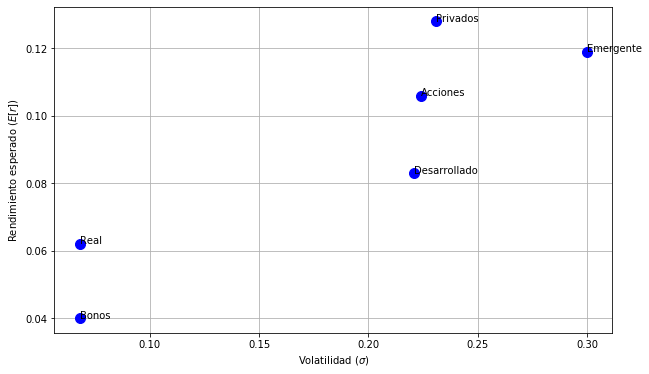

In [9]:
x_points=annual_ret_summ.T.loc[:,'Volatilidad']
y_points=annual_ret_summ.T.loc[:,'Media']
# Ventana para graficar
plt.figure(figsize=(10,6))
# Graficar puntos
plt.plot(x_points,y_points,'ob',ms=10)
plt.grid()
# Etiquetas de los ejes
plt.xlabel('Volatilidad ($\sigma$)')
plt.ylabel('Rendimiento esperado ($E[r]$)')
# Etiqueta de cada instrumento
for i in range (0,6):
    plt.text(x_points[i], y_points[i],annual_ret_summ.T.index[i]) 

## 2. Hallando portafolios sobre la frontera de mínima varianza (35 puntos)

Usando los datos del punto anterior, y los conceptos aprendidos acerca de selección de portafolios con simulación montecarlo (**simular, por lo menos, 1.000.000 portafolios**), aproxime:

1. Los pesos del portafolio de mínima varianza considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio (10 puntos).
 - Compare los resultados obtenidos con los que obtuvo en la Tarea 6 (5 puntos).
3. Los pesos del portafolio EMV considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio (10 puntos).
 - Compare los resultados obtenidos con los que obtuvo en la Tarea 6 (5 puntos).
3. Halle la covarianza y la correlación entre los dos portafolios aproximados (5 puntos).

In [13]:
# Definimos el número de portafolios que simularemos, y la cantidad de activos que tenemos
n_act = len(annual_ret_summ.T)
n_port = 10**6
# Generar una matriz de pesos de n_port x n_act, tal que cada fila sume uno (recordar restricción)
W = np.random.dirichlet(np.array([1, 1, 1, 1, 1, 1]), n_port)
W.shape

(1000000, 6)

In [14]:
annual_ret_sum=annual_ret_summ.drop(['Libre_riesgo'],axis=1).T
annual_ret_sum

,Media,Volatilidad
Bonos,0.04,0.068
Acciones,0.106,0.224
Desarrollado,0.083,0.221
Emergente,0.119,0.3
Privados,0.128,0.231
Real,0.062,0.068


In [15]:
# Rendimientos y volatilidad de cada portafolios
Ep = annual_ret_sum['Media'].values.T.dot(W.T)
Ep.shape

(1000000,)

In [16]:
annual_ret_sum=annual_ret_sum.T
annual_ret_sum

,Bonos,Acciones,Desarrollado,Emergente,Privados,Real
Media,0.04,0.106,0.083,0.119,0.128,0.062
Volatilidad,0.068,0.224,0.221,0.3,0.231,0.068


In [17]:
#Matriz de covarianzas 
S=np.diag(annual_ret_sum.loc['Volatilidad', :].values)
Sigma = S.dot(corr).dot(S)


In [18]:
vol = np.zeros((n_port,))
for i in range(n_port):
    vol[i] = (W[i, : ].T.dot(Sigma).dot(W[i, :]))**0.5

In [19]:
vol.shape

(1000000,)

In [52]:
rf = 0.03

In [53]:
# Radio de Sharpe
Rs = (Ep - rf) / vol

In [51]:
# Data frame de resultados
portafolios = pd.DataFrame({'w1': W[:, 0],
                            'w2': W[:, 1],
                            'w3': W[:, 2],
                            'w4': W[:, 3],
                            'w5': W[:, 4],
                            'w6': W[:, 5],
                            'Media': Ep,
                            'Vol': vol,
                            'Rs': Rs})
portafolios.head()

,w1,w2,w3,w4,w5,w6,Media,Vol,Rs
0,0.030351,0.061818,0.150820,0.311905,0.436666,0.008439,0.113818,0.195145,0.429517
1,0.377210,0.126002,0.109648,0.130704,0.012775,0.243662,0.0698413,0.099046,0.40225
2,0.164117,0.091251,0.003224,0.335260,0.319224,0.086924,0.102651,0.161263,0.450512
3,0.215993,0.162480,0.015338,0.060212,0.028519,0.517459,0.0700337,0.079344,0.50456
4,0.162439,0.513835,0.085178,0.204940,0.003353,0.030255,0.0947267,0.180228,0.359138


In [38]:
# Portafolio EMV
EMV = portafolios.loc[portafolios['Rs'].astype('float64').idxmax()]
EMV

w1         0.0605893
w2        0.00639607
w3       0.000811252
w4         0.0636244
w5          0.133794
w6          0.734785
Media      0.0734225
Vol        0.0750815
Rs          0.578339
Name: 187754, dtype: object

In [39]:
# Portafolio mínima varianza
minvar = portafolios.loc[portafolios['Vol'].idxmin()]
minvar

w1         0.469554
w2       0.00325802
w3        0.0240588
w4       0.00273993
w5        0.0232397
w6         0.477149
Media     0.0540084
Vol       0.0540513
Rs         0.444178
Name: 148018, dtype: object

In [41]:
#Reportar en un data frame 
comparation=pd.DataFrame({'EMV_Montecarlo %': EMV*100,
                    'Minvar_Montecarlo %': minvar*100})
comparation['EMV T6 %']=[1.3429e-15,1.01738e-14,1.23637e-14,8.19188,16.5859,75.2222,7.76161, 8.19274, 58.1199]
comparation['Minvar T6 %']=[49.5147,0,0.0209837,4.33681e-17,0,50.4644,5.11112,5.26736,40.0793]
comparation.round(4)

,EMV_Montecarlo %,Minvar_Montecarlo %,EMV T6 %,Minvar T6 %
w1,6.05893,46.9554,0.0000,49.5147
w2,0.639607,0.325802,0.0000,0.0000
w3,0.0811252,2.40588,0.0000,0.0210
w4,6.36244,0.273993,8.1919,0.0000
w5,13.3794,2.32397,16.5859,0.0000
w6,73.4785,47.7149,75.2222,50.4644
Media,7.34225,5.40084,7.7616,5.1111
Vol,7.50815,5.40513,8.1927,5.2674
Rs,57.8339,44.4178,58.1199,40.0793


In [27]:
#Esperanza y varianza de los portafolios 
E_EMV=comp.loc['Media', 'EMV_Montecarlo']
s_EMV=comp.loc['Vol', 'EMV_Montecarlo']

E_minvar=comp.loc['Media', 'Minvar_Montecarlo']
s_minvar=comp.loc['Vol', 'Minvar_Montecarlo']

w_EMV=comp.loc['w1':'w6', 'EMV_Montecarlo']
w_minvar=comp.loc['w1':'w6','Minvar_Montecarlo']
#Covarianza y correlación entre los portafolios
cov =w_EMV.T.dot(Sigma).dot(w_minvar)
corr=cov/(s_EMV*s_minvar)

cov, corr

(0.0030236264921421783, 0.9382637279119078)

In [28]:
cc = pd.DataFrame(columns=['%'], index=["Covarianza", "Correlacion"])
cc.loc['Covarianza'] = cov*100
cc.loc['Correlacion'] = corr*100
cc

,%
Covarianza,0.302363
Correlacion,93.8264


## 3. Frontera de mínima varianza y LAC (30 puntos)

Con los portafolios que se encontraron en el punto anterior (de mínima varianza y EMV):

**Mucho cuidado, solo es válido este punto si se aproximan los portafolios anteriores por Montecarlo.**

1. Construya la frontera de mínima varianza calculando el rendimiento esperado y volatilidad para varias combinaciones de los anteriores portafolios. Reportar dichas combinaciones en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (15 puntos).
2. También construya la línea de asignación de capital entre el activo libre de riesgo y el portafolio EMV. Reportar las combinaciones de estos activos en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (15 puntos).

In [42]:
#Vector de pesos 
N=300
w= np.linspace(0,3,N)

In [43]:
#Dataframe con pesos, ER, volatilidad y SR
portafolios=pd.DataFrame(data={'w': w,
                              '1-w':1-w,
                              'Media': w*E_EMV+(1-w)*E_minvar,
                              'Vol': ((w*s_EMV)**2+((1-w)*s_minvar)**2+2*w*(1-w)*cov)**0.5,
                              })
portafolios['SR']=(portafolios['Media']-annual_ret_summ.loc['Media', 'Libre_riesgo'])/portafolios['Vol']
portafolios.head()

,w,1-w,Media,Vol,SR
0,0.000000,1.000000,0.054008,0.054051,0.444178
1,0.010033,0.989967,0.054087,0.054071,0.445466
2,0.020067,0.979933,0.054165,0.054091,0.446746
3,0.030100,0.969900,0.054243,0.054112,0.448019
4,0.040134,0.959866,0.054321,0.054133,0.449285


In [44]:
#Dataframe con pesos, ER, volatilidad y SR
LAC=pd.DataFrame(data={'wp': w,
                       'wrf':1-w,
                       'Media': w*E_EMV+(1-w)*annual_ret_summ.loc['Media', 'Libre_riesgo'],
                       'Vol': w*s_EMV,
                              })
LAC['SR']=(LAC['Media']-annual_ret_summ.loc['Media', 'Libre_riesgo'])/LAC['Vol']
LAC.head()

,wp,wrf,Media,Vol,SR
0,0.000000,1.000000,0.030000,0.000000,NaN
1,0.010033,0.989967,0.030319,0.000598,0.533453
2,0.020067,0.979933,0.030638,0.001196,0.533453
3,0.030100,0.969900,0.030957,0.001795,0.533453
4,0.040134,0.959866,0.031276,0.002393,0.533453


## 4. Gráficos y conclusiones (25 puntos)

1. Usando todos los datos obtenidos, grafique:
 - los activos individuales,
 - portafolio de mínima varianza (hallado por Montecarlo en el punto 2),
 - portafolio eficiente en media-varianza (EMV, hallado por Montecarlo en el punto 2),
 - frontera de mínima varianza, y
 - línea de asignación de capital,
en el espacio de rendimiento (eje $y$) vs. volatilidad (eje $x$). Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (15 puntos).
2. Suponga que usted está aconsejando a un cliente cuyo coeficiente de aversión al riesgo resultó ser 4. ¿Qué asignación de capital le sugeriría?, ¿qué significa su resultado?(10 puntos)

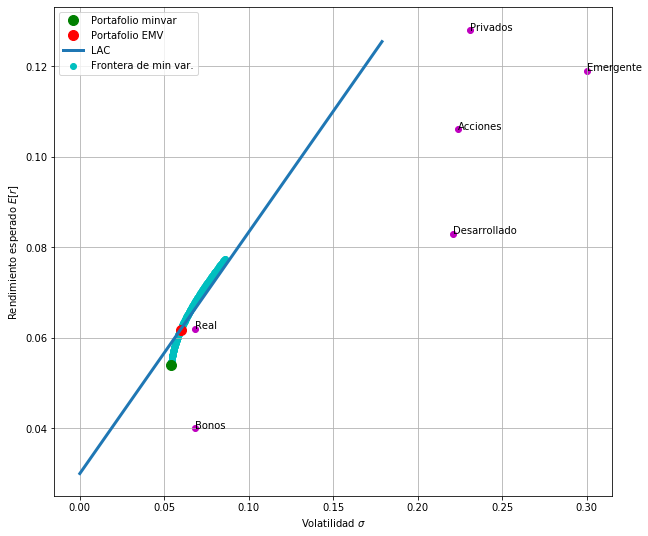

In [45]:
# Gráfica de dispersión de puntos coloreando 
# de acuerdo a SR
plt.figure(figsize=(10,9))
plt.scatter(portafolios['Vol'], portafolios['Media'], c='c', label='Frontera de min var.')
plt.scatter(x_points, y_points, c='m')
plt.plot(s_minvar, E_minvar, 'og', ms=10, label='Portafolio minvar')
plt.plot(s_EMV, E_EMV, 'or', ms=10, label='Portafolio EMV')
plt.plot(LAC['Vol'], LAC['Media'], lw=3, label='LAC')
for i in range (0,6):
    plt.text(x_points[i], y_points[i],annual_ret_summ.T.index[i]) 
plt.legend()
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento esperado $E[r]$')
plt.grid()

In [49]:
#Asignación de capital 
g=4
w_a=(E_EMV-0.03)/(g*s_EMV**2)
w_a1=w_a*w_EMV
w_a1, 1-w_a

(w1      0.528789
 w2    0.00414462
 w3     0.0210897
 w4     0.0652797
 w5      0.103799
 w6       1.51376
 Name: EMV_Montecarlo, dtype: object,
 -1.2368616426379506)

In [47]:
# Asignacion de capital 
a_c = pd.DataFrame(columns=['Asignación de capital %'], index=['Bonos', 'Acciones', 'Desarrollado', 'Emergente', 'Privados', 'Real',"Total"])
a_c.loc['Bonos'] = w_a1[0]*100
a_c.loc['Acciones'] = w_a1[1]*100
a_c.loc['Desarrollado'] = w_a1[2]*100
a_c.loc['Emergente'] = w_a1[3]*100
a_c.loc['Privados'] = w_a1[4]*100
a_c.loc['Real'] = w_a1[5]*100
a_c.loc['Total'] = np.sum(w_a1)*100
a_c

,Asignación de capital %
Bonos,52.8789
Acciones,0.414462
Desarrollado,2.10897
Emergente,6.52797
Privados,10.3799
Real,151.376
Total,223.686


In [50]:
k = np.sum(w_a1)
k

2.2368616426379506

El total que nos aparecio fue un 223.68%. Lo anterior implica una posición corta en el activo libre de riesgo (suponiendo que se puede) y una posición larga (de más del 100%) en el mercado de activos: apalancamiento. Esto significa que el activo libre de riesgo debe ser apalancado con un 123.68%.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>